In [34]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
matplotlib.rc("font", family= 'Noto Sans CJK JP')
from scipy.stats import chi2_contingency

In [3]:
mem=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/members_completed.csv")
mem.head()

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,기혼,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
3,18949760,정상회원,여,73,기업은행,기혼,NaN,강원도,홍천군
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구


In [21]:
bins = [10, 20, 30, 40, 50, 60, 70, 80,101]  # 연령대 범주
labels = ["10대", "20대", "30대", "40대", "50대", "60대", "70대","80대이상"]  # 연령대 레이블
mem["연령대"] = pd.cut(mem["나이"], bins=bins, labels=labels, right=False)
mem.head()

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,연령대
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구,60대
1,18792000,정상회원,남,83,연결앱결제,기혼,False,강원도,강릉시,80대이상
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구,30대
3,18949760,정상회원,여,73,기업은행,기혼,NaN,강원도,홍천군,70대
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구,50대


In [37]:
mem['연령대'].value_counts()

30대      4776
40대      3316
50대      1773
20대      1500
60대       903
70대       240
80대이상      17
10대        15
Name: 연령대, dtype: int64

In [22]:
mem.groupby('연령대')['구독여부'].value_counts().unstack() 

구독여부,False,True
연령대,,
10대,9,2
20대,998,210
30대,3216,629
40대,2246,463
50대,1207,272
60대,594,138
70대,161,35
80대이상,10,4


In [23]:
age_subscription_counts = mem.groupby('연령대')['구독여부'].value_counts().unstack()

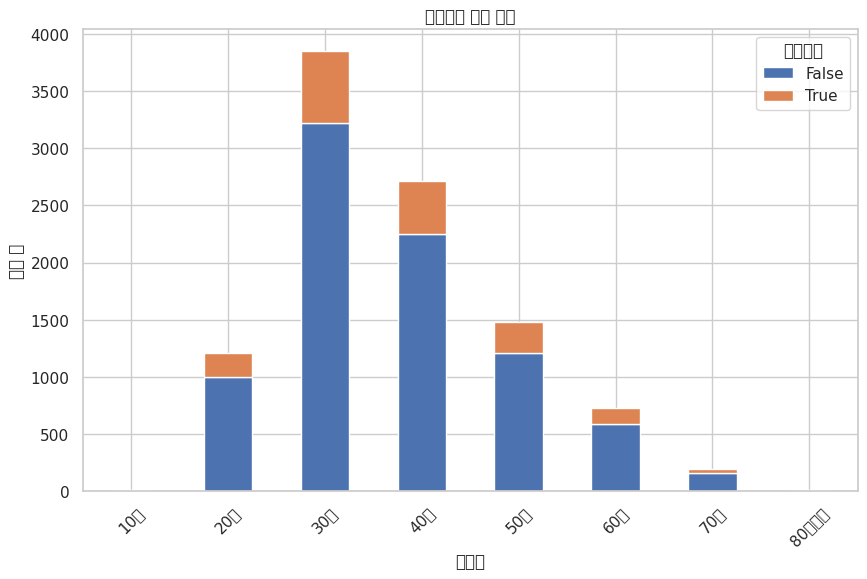

In [32]:
age_subscription_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('연령대별 구독 현황')
plt.xlabel('연령대')
plt.ylabel('구독 수')
plt.xticks(rotation=45)
plt.legend(title='구독여부')
plt.show()


In [33]:
# 연령대별 구독 여부 비율 계산
age_subscription_ratios = mem.groupby('연령대')['구독여부'].value_counts(normalize=True).unstack().fillna(0)
print(age_subscription_ratios)

구독여부      False     True 
연령대                      
10대    0.818182  0.181818
20대    0.826159  0.173841
30대    0.836411  0.163589
40대    0.829088  0.170912
50대    0.816092  0.183908
60대    0.811475  0.188525
70대    0.821429  0.178571
80대이상  0.714286  0.285714


In [36]:
# 교차 테이블 생성
cross_table = pd.crosstab(mem['연령대'], mem['구독여부'])
    
# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_table)

# 결과 출력
print("카이제곱 값:", chi2)
print("p-value:", p)
print("자유도:", dof)
print("예상 빈도:", expected)
print("결론 : p-value가 0.05보다 크기 때문에 귀무가설을 채택한다. 연령대별 구독여부는 동일하다.")

카이제곱 값: 6.176330631739043
p-value: 0.519317819781616
자유도: 7
예상 빈도: [[9.10839710e+00 1.89160290e+00]
 [1.00026761e+03 2.07732392e+02]
 [3.18379880e+03 6.61201197e+02]
 [2.24314979e+03 4.65850206e+02]
 [1.22466539e+03 2.54334609e+02]
 [6.06122425e+02 1.25877575e+02]
 [1.62295076e+02 3.37049245e+01]
 [1.15925054e+01 2.40749460e+00]]
결론 : p-value가 0.05보다 크기 때문에 귀무가설을 채택한다. 연령대별 구독여부는 동일하다.


In [93]:
mem=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/members_completed.csv")
mem.head()

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,기혼,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
3,18949760,정상회원,여,73,기업은행,기혼,NaN,강원도,홍천군
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구


In [95]:
mem['연령대'] = np.where(mem['나이']<20, '10대', np.where(mem['나이']<30, '20대',np.where(mem['나이']<40,'30대',np.where(mem['나이']<50,'40대',np.where(mem['나이']<60,'50대',np.where(mem['나이']<101, '60대이상',"eroror"))))))

In [96]:
mem.head()

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지,연령대
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구,60대이상
1,18792000,정상회원,남,83,연결앱결제,기혼,False,강원도,강릉시,60대이상
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구,30대
3,18949760,정상회원,여,73,기업은행,기혼,NaN,강원도,홍천군,60대이상
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구,50대


In [98]:
mem['연령대'].value_counts()

30대      4776
40대      3316
50대      1773
20대      1500
60대이상    1160
10대        15
Name: 연령대, dtype: int64

In [97]:
mem.shape

(12540, 10)

In [99]:
mem = mem[mem['연령대']!='10대']

In [100]:
mem['연령대'].value_counts()

30대      4776
40대      3316
50대      1773
20대      1500
60대이상    1160
Name: 연령대, dtype: int64

In [103]:
tmp =mem.groupby('연령대')['구독여부'].value_counts().unstack()

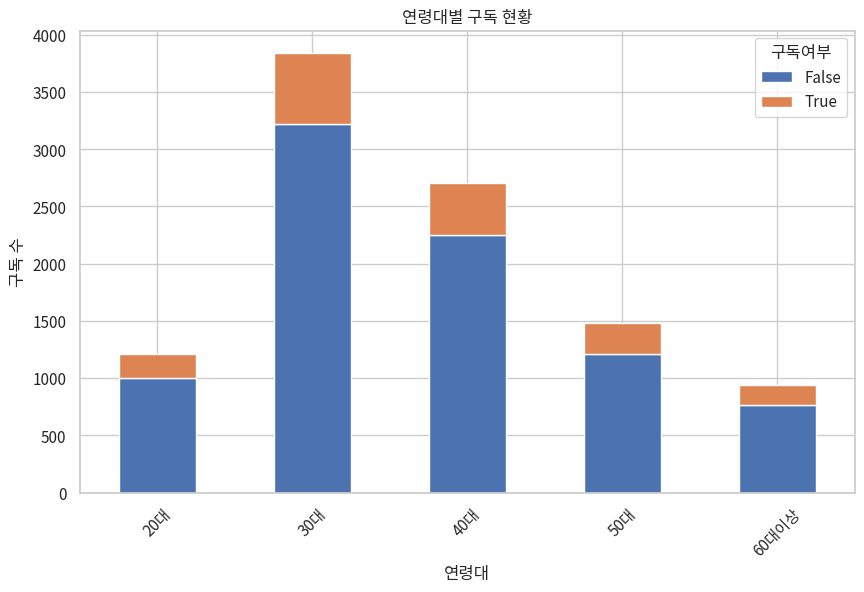

In [104]:
tmp.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('연령대별 구독 현황')
plt.xlabel('연령대')
plt.ylabel('구독 수')
plt.xticks(rotation=45)
plt.legend(title='구독여부')
plt.show()


In [105]:
# 연령대별 구독 여부 비율 계산
age_subscription_ratios = mem.groupby('연령대')['구독여부'].value_counts(normalize=True).unstack().fillna(0)
print(age_subscription_ratios)

구독여부      False     True 
연령대                      
20대    0.826159  0.173841
30대    0.836411  0.163589
40대    0.829088  0.170912
50대    0.816092  0.183908
60대이상  0.812102  0.187898


In [106]:
# 교차 테이블 생성
cross_table = pd.crosstab(mem['연령대'], mem['구독여부'])
    
# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_table)

# 결과 출력
print("카이제곱 값:", chi2)
print("p-value:", p)
print("자유도:", dof)
print("예상 빈도:", expected)
print("결론 : p-value가 0.05보다 크기 때문에 귀무가설을 채택한다. 연령대별 구독여부는 동일하다.")

카이제곱 값: 5.1065926701361635
p-value: 0.27653424407315796
자유도: 4
예상 빈도: [[1000.28046745  207.71953255]
 [3183.83973289  661.16026711]
 [2243.17863105  465.82136895]
 [1224.68113523  254.31886477]
 [ 780.02003339  161.97996661]]
결론 : p-value가 0.05보다 크기 때문에 귀무가설을 채택한다. 연령대별 구독여부는 동일하다.


## 주고객층과 일반고객 사이의 구독여부차이 

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
matplotlib.rc("font", family= 'Noto Sans CJK JP')
from scipy.stats import chi2_contingency

In [279]:
mem=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/members_completed.csv")
mem.head()

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,기혼,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
3,18949760,정상회원,여,73,기업은행,기혼,NaN,강원도,홍천군
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구


In [280]:
mem['회원상태'].value_counts()

정상회원     12380
탈퇴         156
탈퇴처리중        2
정상           1
탈퇴신청         1
Name: 회원상태, dtype: int64

In [281]:
mem = mem[mem['회원상태']=='정상회원']

In [282]:
mem['고객층'] = np.where(mem['나이']<20, '일반고객', np.where(mem['나이']<30, '일반고객',np.where(mem['나이']<40,'주고객층',np.where(mem['나이']<50,'주고객층',np.where(mem['나이']<60,'일반고객',np.where(mem['나이']<101, '일반고객',"eroror"))))))

In [283]:
mem['고객층'].value_counts()

주고객층    7994
일반고객    4386
Name: 고객층, dtype: int64

In [284]:
mem.groupby('고객층')['구독여부'].value_counts().unstack() 

구독여부,False,True
고객층,,
일반고객,2936,654
주고객층,5390,1077


In [285]:
age_subscription_counts = mem.groupby('고객층')['구독여부'].value_counts().unstack()

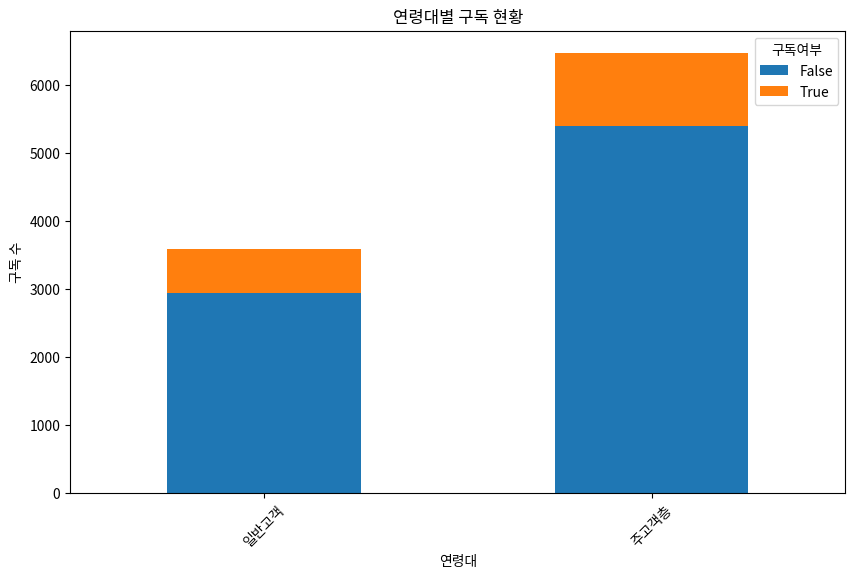

In [286]:
age_subscription_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('연령대별 구독 현황')
plt.xlabel('연령대')
plt.ylabel('구독 수')
plt.xticks(rotation=45)
plt.legend(title='구독여부')
plt.show()


In [287]:
# 연령대별 구독 여부 비율 계산
age_subscription_ratios = mem.groupby('고객층')['구독여부'].value_counts(normalize=True).unstack().fillna(0)
print(age_subscription_ratios)

구독여부     False     True 
고객층                     
일반고객  0.817827  0.182173
주고객층  0.833462  0.166538


In [288]:
# 교차 테이블 생성
cross_table = pd.crosstab(mem['고객층'], mem['구독여부'])
    
# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_table)

# 결과 출력
print("카이제곱 값:", chi2)
print("p-value:", p)
print("자유도:", dof)
print("예상 빈도:", expected)
print("결론 : p-value가 0.05보다 작기 때문에 귀무가설을 채택한다. 주고객층(30,40대)와 일반고객(나머지)별 구독여부는 다르다.")

카이제곱 값: 3.851283169569191
p-value: 0.04970794801682395
자유도: 1
예상 빈도: [[2972.0930695  617.9069305]
 [5353.9069305 1113.0930695]]
결론 : p-value가 0.05보다 작기 때문에 귀무가설을 채택한다. 주고객층(30,40대)와 일반고객(나머지)별 구독여부는 다르다.
